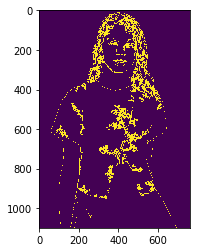

In [1]:
import cv2 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt

#== Parameters ======================================================================= 
BLUR = 21 
CANNY_THRESH_1 = 10 
CANNY_THRESH_2 = 200 
MASK_DILATE_ITER = 10 
MASK_ERODE_ITER = 10 
MASK_COLOR = (0.0,0.0,1.0) # In BGR format 


#== Processing ======================================================================= 

#-- Read image ----------------------------------------------------------------------- 
img = cv2.imread('Mujer.jpg') 
#img=cv2.resize(img,(480,270))#resize image
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
#plt.imshow(gray);

#-- Edge detection ------------------------------------------------------------------- 
edges = cv2.Canny(gray, CANNY_THRESH_1, CANNY_THRESH_2) 
edges = cv2.dilate(edges, None) 
edges = cv2.erode(edges, None) 
plt.imshow(edges);


Creating Mask...
Creating 3-channel alpha mask...
3-channel alpha mask has been created


True

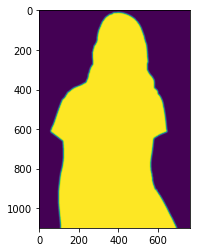

In [2]:
#-- Find contours in edges, sort by area --------------------------------------------- 
contour_info = [] 
_, contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE) 
for c in contours: 
    contour_info.append((
     c, 
     cv2.isContourConvex(c), 
     cv2.contourArea(c), 
    )) 
contour_info = sorted(contour_info, key=lambda c: c[2], reverse=True) 
#print(contour_info)
max_contour = contour_info[0] 

#-- Create empty mask, draw filled polygon on it corresponding to largest contour ---- 
# Mask is black, polygon is white 
mask = np.zeros(edges.shape) 
cv2.fillConvexPoly(mask, max_contour[0], (255)) 

#-- Smooth mask, then blur it -------------------------------------------------------- 
mask = cv2.dilate(mask, None, iterations=MASK_DILATE_ITER) 
#plt.imshow(mask);
mask = cv2.erode(mask, None, iterations=MASK_ERODE_ITER) 
#plt.imshow(mask);
mask = cv2.GaussianBlur(mask, (BLUR, BLUR), 0) 
print('Creating Mask...')
plt.imshow(mask);
#mask_stack = np.dstack([mask]*3) # Create 3-channel alpha mask 

############################################
#-- Blend masked img into MASK_COLOR background -------------------------------------- 
#mask_stack = mask_stack.astype('float32')/255.0   # Use float matrices, 
#img   = img.astype('float32')/255.0     # for easy blending 

#masked = (mask_stack * img) + ((1-mask_stack) * MASK_COLOR) # Blend 
#masked = (masked * 255).astype('uint8')      # Convert back to 8-bit 

#cv2.imshow('img', masked)         # Display 
#cv2.waitKey() 

#cv2.imwrite('mujer-masked.jpg', masked)   # Save 
###########################################

print('Creating 3-channel alpha mask...')
mask_stack = np.dstack([mask]*3) # Create 3-channel alpha mask
print('3-channel alpha mask has been created')

#-- Blend masked img into MASK_COLOR background -------------------------------------- 
mask_stack = mask_stack.astype('float32')/255.0   # Use float matrices, 
img   = img.astype('float32')/255.0     # for easy blending 

masked = (mask_stack * img) + ((1-mask_stack) * MASK_COLOR) # Blend 
masked = (masked * 255).astype('uint8')      # Convert back to 8-bit 

cv2.imshow('img', masked)         # Display 
#cv2.waitKey() #Pulsar tecla para seguir con el código

cv2.imwrite('mujer-masked.jpg', masked)   # Save 

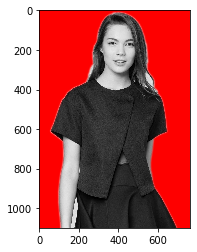

In [3]:
image = plt.imread('mujer-masked.jpg')
cv2.imshow(image);

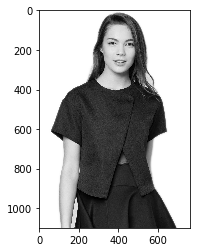

In [4]:
########################################################################
##########################Fondo transparente############################
# split image into channels 
c_red, c_green, c_blue = cv2.split(img) 

# merge with mask got on one of a previous steps 
img_a = cv2.merge((c_red, c_green, c_blue, mask.astype('float32')/255.0)) 

# show on screen (optional in jupiter) 
%matplotlib inline 
plt.imshow(img_a) 
plt.show() 

# save to disk 
cv2.imwrite('girl_1.png', img_a*255) 

# or the same using plt 
plt.imsave('girl_2.png', img_a) 

### Aplicado al polen...

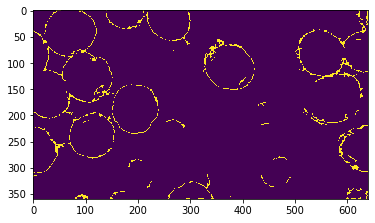

In [29]:
import cv2 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt

#== Parameters ======================================================================= 
BLUR = 21
CANNY_THRESH_1 = 48
CANNY_THRESH_2 = 20
MASK_DILATE_ITER = 5
MASK_ERODE_ITER = 5
MASK_COLOR = (0.0,0.0,1.0) # In BGR format 


#== Processing ======================================================================= 

#-- Read image ----------------------------------------------------------------------- 
img = cv2.imread('Muestra10.jpg') 
img=cv2.resize(img,(640,360))#resize image
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
#plt.imshow(gray);

#-- Edge detection ------------------------------------------------------------------- 
edges = cv2.Canny(gray, CANNY_THRESH_1, CANNY_THRESH_2) 
edges = cv2.dilate(edges, None) 
edges = cv2.erode(edges, None) 
plt.imshow(edges);


In [27]:
print(edges)

[[  0   0   0 ...   0 255 255]
 [  0   0   0 ...   0 255 255]
 [  0   0   0 ...   0 255 255]
 ...
 [  0   0   0 ... 255   0   0]
 [  0   0   0 ... 255   0   0]
 [  0   0   0 ... 255   0   0]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Creating Mask...
Creating 3-channel alpha mask...
3-channel alpha mask has been created


True

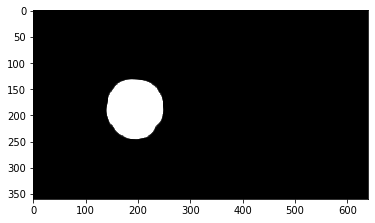

In [28]:
#-- Find contours in edges, sort by area --------------------------------------------- 
contour_info = [] 
_, contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE) 
for c in contours: 
    contour_info.append((
     c, 
     cv2.isContourConvex(c), 
     cv2.contourArea(c), 
    )) 
contour_info = sorted(contour_info, key=lambda c: c[2], reverse=True) 
#print(contour_info)
max_contour = contour_info[0] 

#-- Create empty mask, draw filled polygon on it corresponding to largest contour ---- 
# Mask is black, polygon is white 
mask = np.zeros(edges.shape) 
cv2.fillConvexPoly(mask, max_contour[0], (255)) 

#-- Smooth mask, then blur it -------------------------------------------------------- 
mask = cv2.dilate(mask, None, iterations=MASK_DILATE_ITER) 
#plt.imshow(mask);
mask = cv2.erode(mask, None, iterations=MASK_ERODE_ITER) 
#plt.imshow(mask);
mask = cv2.GaussianBlur(mask, (BLUR, BLUR), 0) 
print('Creating Mask...')
plt.imshow(mask);
#mask_stack = np.dstack([mask]*3) # Create 3-channel alpha mask 

############################################
#-- Blend masked img into MASK_COLOR background -------------------------------------- 
#mask_stack = mask_stack.astype('float32')/255.0   # Use float matrices, 
#img   = img.astype('float32')/255.0     # for easy blending 

#masked = (mask_stack * img) + ((1-mask_stack) * MASK_COLOR) # Blend 
#masked = (masked * 255).astype('uint8')      # Convert back to 8-bit 

#cv2.imshow('img', masked)         # Display 
#cv2.waitKey() 

#cv2.imwrite('mujer-masked.jpg', masked)   # Save 
###########################################

print('Creating 3-channel alpha mask...')
mask_stack = np.dstack([mask]*3) # Create 3-channel alpha mask
print('3-channel alpha mask has been created')
plt.imshow(mask_stack)

#-- Blend masked img into MASK_COLOR background -------------------------------------- 
mask_stack = mask_stack.astype('float32')/255.0   # Use float matrices, 
img   = img.astype('float32')/255.0     # for easy blending 

masked = (mask_stack * img) + ((1-mask_stack) * MASK_COLOR) # Blend 
masked = (masked * 255).astype('uint8')      # Convert back to 8-bit 

cv2.imshow('img', masked)         # Display 
#cv2.waitKey() #Pulsar tecla para seguir con el código

cv2.imwrite('polen-masked.jpg', masked)   # Save 

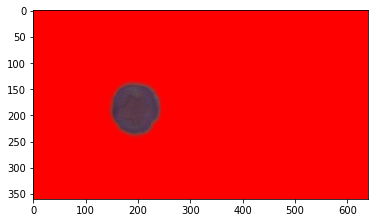

In [24]:
image = plt.imread('polen-masked.jpg')
plt.imshow(image);

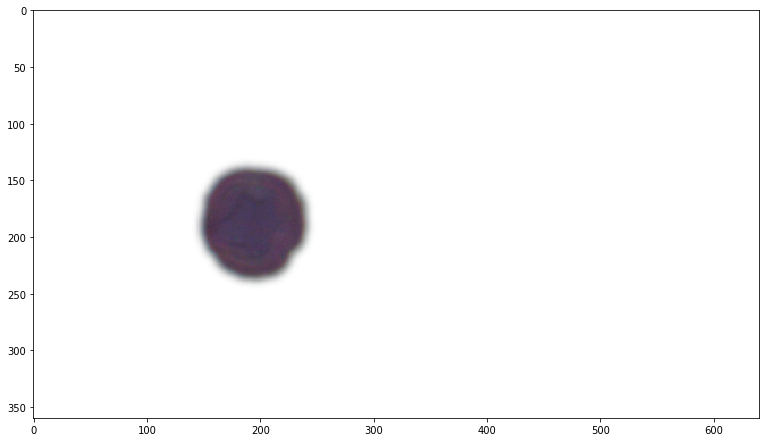

True

In [25]:
########################################################################
##########################Fondo transparente############################
# split image into channels 
c_red, c_green, c_blue = cv2.split(img) 

# merge with mask got on one of a previous steps 
img_a = cv2.merge((c_red, c_green, c_blue, mask.astype('float32')/255.0)) 

# show on screen (optional in jupiter) 
%matplotlib inline 
plt.figure(figsize=(13,9))
plt.imshow(img_a) 
plt.show() 

# save to disk 
cv2.imwrite('polen_10.png', img_a*255) 

# or the same using plt 
#plt.imsave('girl_2.png', img_a) 